<a href="https://colab.research.google.com/github/zulkernine/MachineLearning/blob/master/movieReview_IMDB_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the dataset

In [1]:
%tensorflow_version 2.x
from keras.datasets import imdb
(train_data, train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

TensorFlow 2.x selected.


Using TensorFlow backend.


Look the data

In [2]:
#train_data[0]
#max([max (sequence) for sequence in train_data])

word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

Encode the integer sequence in abinary matrix

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [4]:
#Look at sample data after preprocessing
x_train[506]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
#Vectorize the label

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


Develope the model

In [8]:

import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

print(tf.__version__)

2.1.0


In [0]:
#Compilation

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Validate the approach:
Creat dataset for validation

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Train the model

In [11]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 161us/sample - loss: 0.5177 - accuracy: 0.7797 - val_loss: 0.4019 - val_accuracy: 0.8521
Epoch 2/20
15000/15000 [==============================] - 2s 103us/sample - loss: 0.3076 - accuracy: 0.9034 - val_loss: 0.3278 - val_accuracy: 0.8732
Epoch 3/20
15000/15000 [==============================] - 2s 103us/sample - loss: 0.2241 - accuracy: 0.9283 - val_loss: 0.3038 - val_accuracy: 0.8793
Epoch 4/20
15000/15000 [==============================] - 2s 106us/sample - loss: 0.1780 - accuracy: 0.9417 - val_loss: 0.2746 - val_accuracy: 0.8878
Epoch 5/20
15000/15000 [==============================] - 2s 105us/sample - loss: 0.1439 - accuracy: 0.9548 - val_loss: 0.2842 - val_accuracy: 0.8850
Epoch 6/20
15000/15000 [==============================] - 2s 104us/sample - loss: 0.1190 - accuracy: 0.9621 - val_loss: 0.2995 - val_accuracy: 0.8851
Epoch 7/20
15000/15000 [==========================

In [12]:
#Look into history

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting the training and validation loss

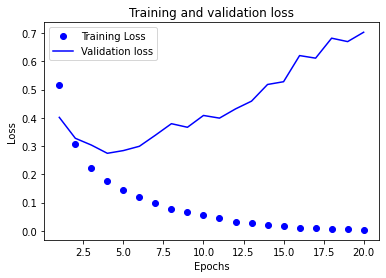

In [17]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(history_dict['accuracy'])+1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plotting the training and validation accuracy

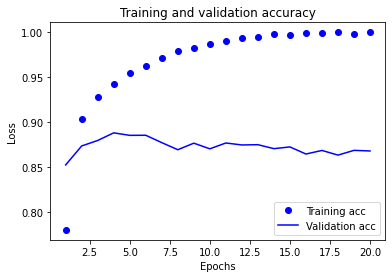

In [21]:
#Clears the figure

plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Retrain with a new model and less epoch(To decrease overfitting)

In [40]:
#Define the model
newModel = tf.keras.Sequential()
newModel.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
newModel.add(layers.Dense(64, activation='relu'))
newModel.add(layers.Dense(32, activation='relu'))
newModel.add(layers.Dense(16, activation='relu'))
newModel.add(layers.Dense(1,activation='sigmoid'))

#compile it
newModel.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#train
newModel.fit(x_train, y_train, epochs=4, batch_size=512)
results = newModel.evaluate(x_test,y_test)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 3s 129us/sample - loss: 0.4374 - accuracy: 0.8060
Epoch 2/4
25000/25000 [==============================] - 3s 109us/sample - loss: 0.2376 - accuracy: 0.9102
Epoch 3/4
25000/25000 [==============================] - 3s 109us/sample - loss: 0.1935 - accuracy: 0.9256
Epoch 4/4
25000/25000 [==============================] - 2s 100us/sample - loss: 0.3580 - accuracy: 0.8770


In [41]:
results

[0.3579707163262367, 0.87696]

Using a trained network to generate predictions on new data

In [42]:
newModel.predict(x_test)

array([[0.13084355],
       [0.9999932 ],
       [0.9993881 ],
       ...,
       [0.14555842],
       [0.08026977],
       [0.8949774 ]], dtype=float32)